<a href="https://colab.research.google.com/github/Aayushmatkar/BMG5111-datascience-for-engineers/blob/main/glaucomaAVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import files

# Upload the Kaggle API key (kaggle.json) that you downloaded
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priyankapratapmore","key":"b505f1e201b651e9170182e297d0c783"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d sabari50312/fundus-pytorch

100% 3.80G/3.82G [00:41<00:00, 131MB/s]
100% 3.82G/3.82G [00:41<00:00, 99.7MB/s]


In [ ]:
!unzip -q  fundus-pytorch.zip -d dataset

##using CNN to train

In [ ]:
import tensorflow as tf
from keras.api._v2.keras.preprocessing.image import ImageDataGenerator

# training directories
train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/test'

#ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# shaping the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

# model fitting
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Found 8621 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.


Epoch 1/10
100/100 [==============================] - 148s 1s/step - loss: 0.6624 - accuracy: 0.6335 - val_loss: 0.6260 - val_accuracy: 0.7300
Epoch 2/10
100/100 [==============================] - 139s 1s/step - loss: 0.6086 - accuracy: 0.6990 - val_loss: 0.6317 - val_accuracy: 0.6890
Epoch 3/10
100/100 [==============================] - 157s 2s/step - loss: 0.5744 - accuracy: 0.7095 - val_loss: 0.5493 - val_accuracy: 0.7440
Epoch 4/10
100/100 [==============================] - 134s 1s/step - loss: 0.5506 - accuracy: 0.7395 - val_loss: 0.5777 - val_accuracy: 0.7080
Epoch 5/10
100/100 [==============================] - 133s 1s/step - loss: 0.5307 - accuracy: 0.7451 - val_loss: 0.6858 - val_accuracy: 0.6460
Epoch 6/10
100/100 [==============================] - 133s 1s/step - loss: 0.4829 - accuracy: 0.7810 - val_loss: 0.4580 - val_accuracy: 0.7800
Epoch 7/10
 49/100 [=============>................] - ETA: 1:01 - loss: 0.4789 - accuracy: 0.7704

## testing the model


In [ ]:
from keras.api._v2.keras.preprocessing import image
import numpy as np


img_path = '/content/dataset/val/0/BEH-349.png'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.


#prediction part
prediction = model.predict(img_tensor)
print(prediction)

#printing th eresults
#future reference 0.5 is set since the dataset was a binary form of data so 0.5 is a good actuation to trigger the results
if prediction > 0.5:
    print("The model predicts this image is labeled '1'")
else:
    print("The model predicts this image is labeled '0'")


1/1 [==============================] - 0s 170ms/step
The model predicts this image is labeled '0'


Please enter the path to your image: /content/dataset/test/1/CRFO-v4-27.png


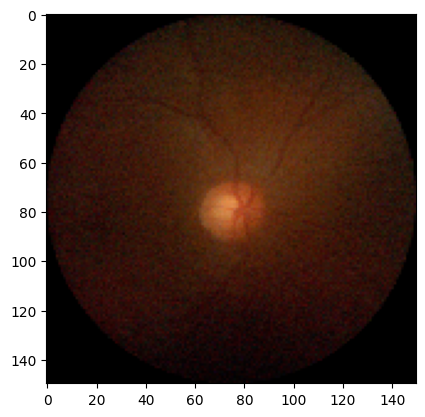

1/1 [==============================] - 0s 42ms/step
[[0.5333119]]
The model predicts this image is labeled '1'


In [ ]:
from keras.api._v2.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Get the image path from the user
img_path = input("Please enter the path to your image: ")

# Load the image
img = image.load_img(img_path, target_size=(150, 150))

# Display the image
plt.imshow(img)
plt.show()

# Preprocess the image
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Use the model to predict the label of the new image
prediction = model.predict(img_tensor)
print(prediction)
# Print the prediction
if prediction > 0.5:
    print("The model predicts this image is labeled '1'")
else:
    print("The model predicts this image is labeled '0'")


/content/dataset/test/1/CRFO-v4-42.png